# A Demo and Comparison of Categorical Methods (Pt. 2)

**Please refer to [part 1](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-demo.ipynb) first for a more comprehensive explanation.**

Similar to part 1, we will be following [this categorical encoding guide](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb) and comparing different categorical encoding methods on a dataset.

For this notebook, we will be using [this Kaggle dataset on predicting restaurant visitors](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting/data) for analyzing different categorical encoding approaches. In this repo, we will aim to predict the number of visitors a restaurant will receive on a given date based on information from the reservation websites, the date/location, and details about the restaurant itself.

In [1]:
import featuretools as ft
import utils2
ft.__version__

W0723 18:31:13.016826 140653299464000 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'0.9.1'

## Load EntitySet

The data is structured in such a way that there are two distinct websites for reservations that are used. Thus, the data is initially stored in separate datasets. For a more detailed explanation behind the data preparation, check out the [utils2.py] file.

In [2]:
es = utils2.load_entityset()
es

/home/ubuntu/categorical-encoding/notebooks/utils2.py:86: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  combined_reserve = (pd.concat([air_reserve, hpg_reserve], ignore_index=True)


Entityset: customer_data
  Entities:
    store_info [Rows: 14004, Columns: 6]
    visit_data [Rows: 252108, Columns: 6]
    reservations [Rows: 2092698, Columns: 10]
    date_info [Rows: 517, Columns: 2]
    genres [Rows: 45, Columns: 1]
  Relationships:
    store_info.genre_name -> genres.genre_name
    visit_data.store_id -> store_info.store_id
    reservations.store_calendar_id -> visit_data.store_calendar_id

## Visualize Data

The entity `date_info` is not connected to the entityset, but we include it for visualization purposes/to understand the data better.

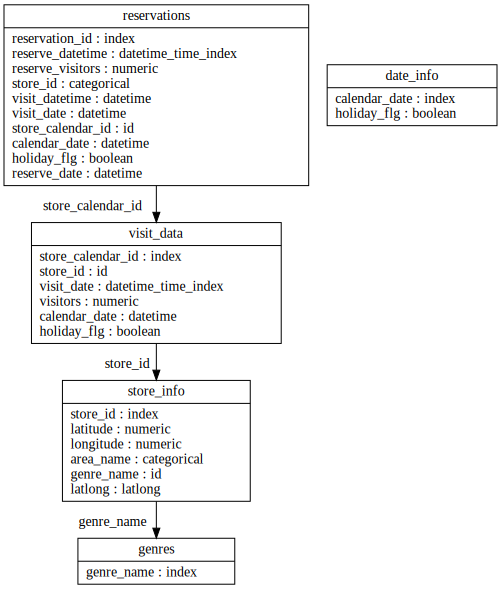

In [3]:
es.plot()

## Automated Feature Engineering

We apply Featuretools' Deep Feature Synthesis in order to generate our features.

In [4]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="visit_data",
                                      verbose=True,
                                      drop_contains=['visit_data.visitors'])
feature_defs[:10]

Built 77 features
Elapsed: 03:12 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


[<Feature: store_id>,
 <Feature: visitors>,
 <Feature: holiday_flg>,
 <Feature: SUM(reservations.reserve_visitors)>,
 <Feature: STD(reservations.reserve_visitors)>,
 <Feature: MAX(reservations.reserve_visitors)>,
 <Feature: SKEW(reservations.reserve_visitors)>,
 <Feature: MIN(reservations.reserve_visitors)>,
 <Feature: MEAN(reservations.reserve_visitors)>,
 <Feature: COUNT(reservations)>]

In [ ]:
es['store_info'].df['area_name'].describe()

count                          5456
unique                          214
top       Tōkyō-to Shinjuku-ku None
freq                            255
Name: area_name, dtype: object

This column is a high cardinality feature because it has 214 unique categorical values, higher than the limit of 15 we set in [our guide](https://github.com/FeatureLabs/categorical-encoding/blob/master/notebooks/categorical-encoding-guide.ipynb).

This means that for certain categorical encoding methods such as one-hot encoding, we may face issues due to our resulting matrix's high dimensionality.

In [ ]:
bayesian_results = utils2.bayesian_encoder_results(feature_matrix)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.2734	valid-rmse:23.0404
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.5019	valid-rmse:10.371
[200]	train-rmse:10.1065	valid-rmse:10.2511
[226]	train-rmse:9.97589	valid-rmse:10.2108


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.271	valid-rmse:23.0253
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.5012	valid-rmse:10.5157
[200]	train-rmse:10.1086	valid-rmse:10.3595
[226]	train-rmse:10.021	valid-rmse:10.3339


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.2178	valid-rmse:23.144
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.2828	valid-rmse:10.9
[200]	train-rmse:9.90898	valid-rmse:10.7733
[226]	train-rmse:9.80683	valid-rmse:10.7473


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.1994	valid-rmse:23.1973
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.3786	valid-rmse:10.6216
[200]	train-rmse:10.0323	valid-rmse:10.505
[226]	train-rmse:9.93358	valid-rmse:10.4699


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.1547	valid-rmse:23.2795
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.2145	valid-rmse:10.9024
[200]	train-rmse:9.89376	valid-rmse:10.8148
[226]	train-rmse:9.7651	valid-rmse:10.7725


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.1947	valid-rmse:23.2055
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.3256	valid-rmse:10.7897
[200]	train-rmse:9.97555	valid-rmse:10.6698
[226]	train-rmse:9.85893	valid-rmse:10.6284


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.2004	valid-rmse:23.2596
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.3453	valid-rmse:10.7598
[200]	train-rmse:9.90785	valid-rmse:10.5922
[226]	train-rmse:9.8432	valid-rmse:10.5732


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.2413	valid-rmse:23.178
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.4745	valid-rmse:10.6884
[200]	train-rmse:10.1137	valid-rmse:10.5218
[226]	train-rmse:10.0217	valid-rmse:10.4929


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.226	valid-rmse:23.186
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.328	valid-rmse:10.8732
[200]	train-rmse:9.93043	valid-rmse:10.7385
[226]	train-rmse:9.88052	valid-rmse:10.7298


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.2213	valid-rmse:23.332
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.3363	valid-rmse:10.8467
[200]	train-rmse:9.99603	valid-rmse:10.7167
[226]	train-rmse:9.89175	valid-rmse:10.6788


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.3061	valid-rmse:23.155
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.3942	valid-rmse:10.5777
[200]	train-rmse:10.0483	valid-rmse:10.4531
[226]	train-rmse:9.98692	valid-rmse:10.4337


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.1048	valid-rmse:23.5592
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.1026	valid-rmse:11.2811
[200]	train-rmse:9.74377	valid-rmse:11.1435
[226]	train-rmse:9.63602	valid-rmse:11.1171


In [ ]:
bayesian_results

,Encoder,Score,# Columns,Average Elapsed Time
0,TargetEncoder,SCORE: 0.60 +/- 0.01,76,10.593713
1,LeaveOneOutEncoder,SCORE: 0.60 +/- 0.01,76,10.969039
2,JamesSteinEncoder,SCORE: 0.60 +/- 0.01,76,10.576541
3,MEstimateEncoder,SCORE: 0.59 +/- 0.01,76,10.624966


In [ ]:
classic_results = utils2.classic_encoder_results(feature_matrix)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.7344	valid-rmse:23.6356
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.6584	valid-rmse:11.1983
[200]	train-rmse:10.0439	valid-rmse:10.8421
[226]	train-rmse:9.9334	valid-rmse:10.801


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.7186	valid-rmse:23.7067
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.6186	valid-rmse:11.264
[200]	train-rmse:10.0338	valid-rmse:10.9367
[226]	train-rmse:9.91288	valid-rmse:10.8971


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.7342	valid-rmse:23.6623
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:10.8883	valid-rmse:10.8589
[200]	train-rmse:10.322	valid-rmse:10.4886
[226]	train-rmse:10.2165	valid-rmse:10.4431


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.512	valid-rmse:24.0135
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:11.7651	valid-rmse:12.8642
[200]	train-rmse:11.1174	valid-rmse:12.3132
[226]	train-rmse:11.0098	valid-rmse:12.225


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:23.6062	valid-rmse:23.7945
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 60 rounds.
[100]	train-rmse:11.8977	valid-rmse:12.226
[200]	train-rmse:11.3127	valid-rmse:11.7032
[226]	train-rmse:11.2158	valid-rmse:11.6209


/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [ ]:
classic_results